In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

rcParams['figure.figsize'] = (8,6)
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('Credit Card.csv')
df_copy = df.copy()
print('Shape of the data frame is:', df.shape)

Shape of the data frame is: (8950, 18)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [36]:
df.isnull().sum(axis=0)*100/df.shape[0]

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [37]:
important_columns = ['BALANCE',
                     'BALANCE_FREQUENCY',
                     'PURCHASES',
                     'ONEOFF_PURCHASES',
                     'INSTALLMENTS_PURCHASES',
                     'CASH_ADVANCE',
                     'PURCHASES_FREQUENCY',
                     'ONEOFF_PURCHASES_FREQUENCY',
                     'PURCHASES_INSTALLMENTS_FREQUENCY',
                     'CASH_ADVANCE_FREQUENCY',
                     'CASH_ADVANCE_TRX',
                     'PURCHASES_TRX',
                     'CREDIT_LIMIT',
                     'PAYMENTS',
                     'MINIMUM_PAYMENTS',
                     'PRC_FULL_PAYMENT'] 
final_data = df[important_columns].dropna()

In [38]:
corr_matrix = final_data.corr()

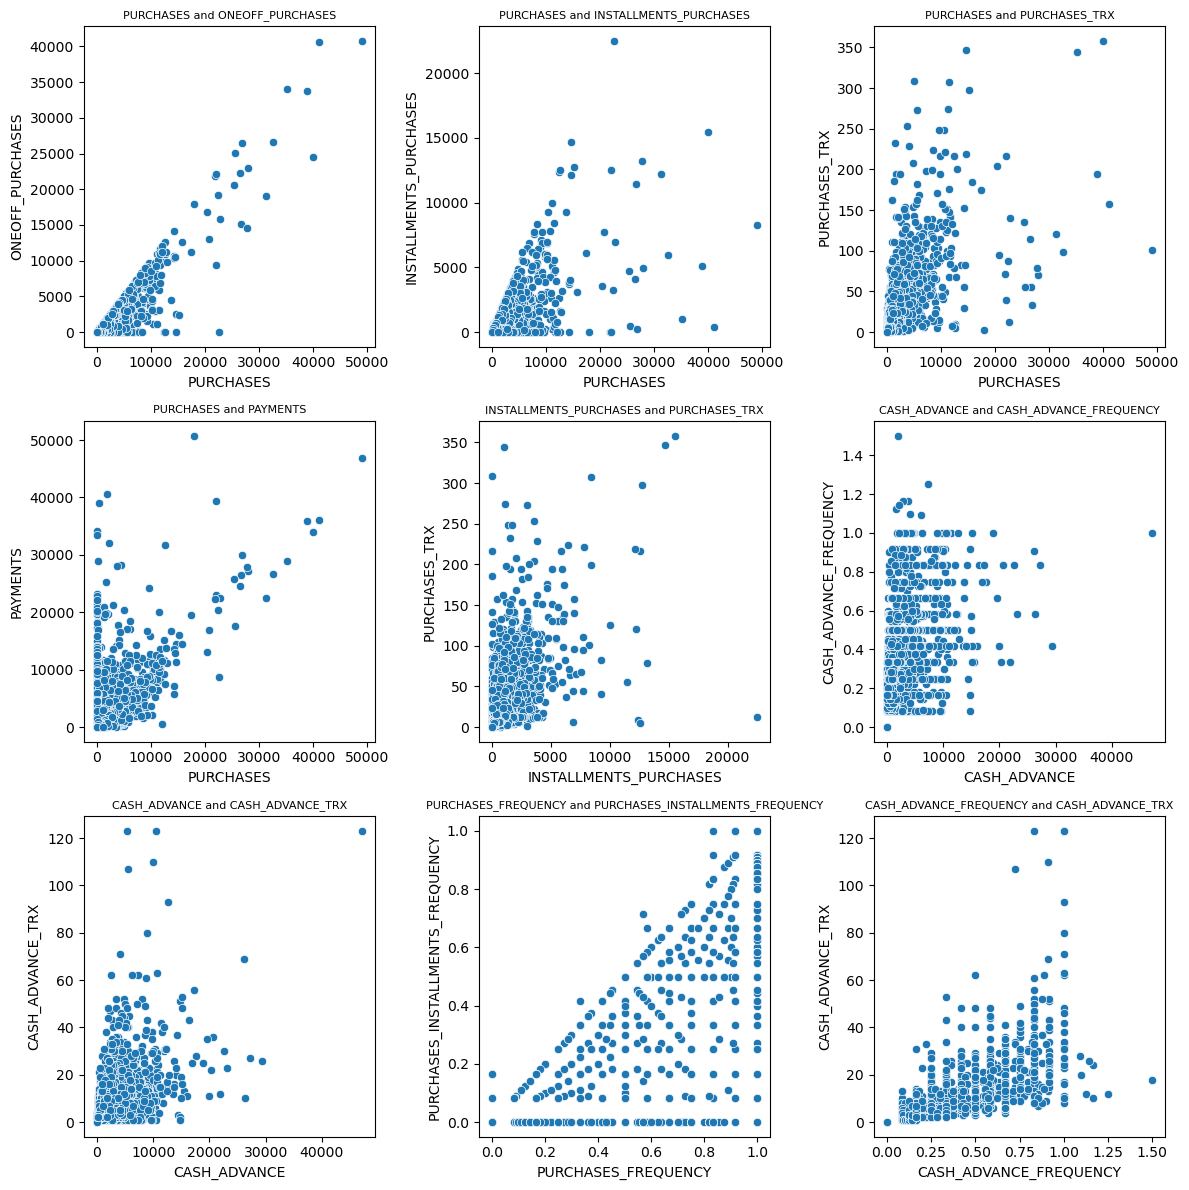

In [44]:
# Find pairs of columns with correlation greater than 0.60or less than -0.6
high_corr_pairs = []
checked = set() 
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.6 and (col2, col1) not in checked:
            high_corr_pairs.append((col1, col2))
            checked.add((col1, col2))

# Create subplots
num_pairs = len(high_corr_pairs)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_pairs + num_cols - 1) // num_cols  # Number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))

# scatter plot matrix for the selected pairs
for i, pair in enumerate(high_corr_pairs):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.scatterplot(data=final_data, x=pair[0], y=pair[1], ax=ax)
    ax.set_title(f'{pair[0]} and {pair[1]}', fontsize=8)

plt.tight_layout()
plt.show()

#### <center>Distribution of important columns </center>

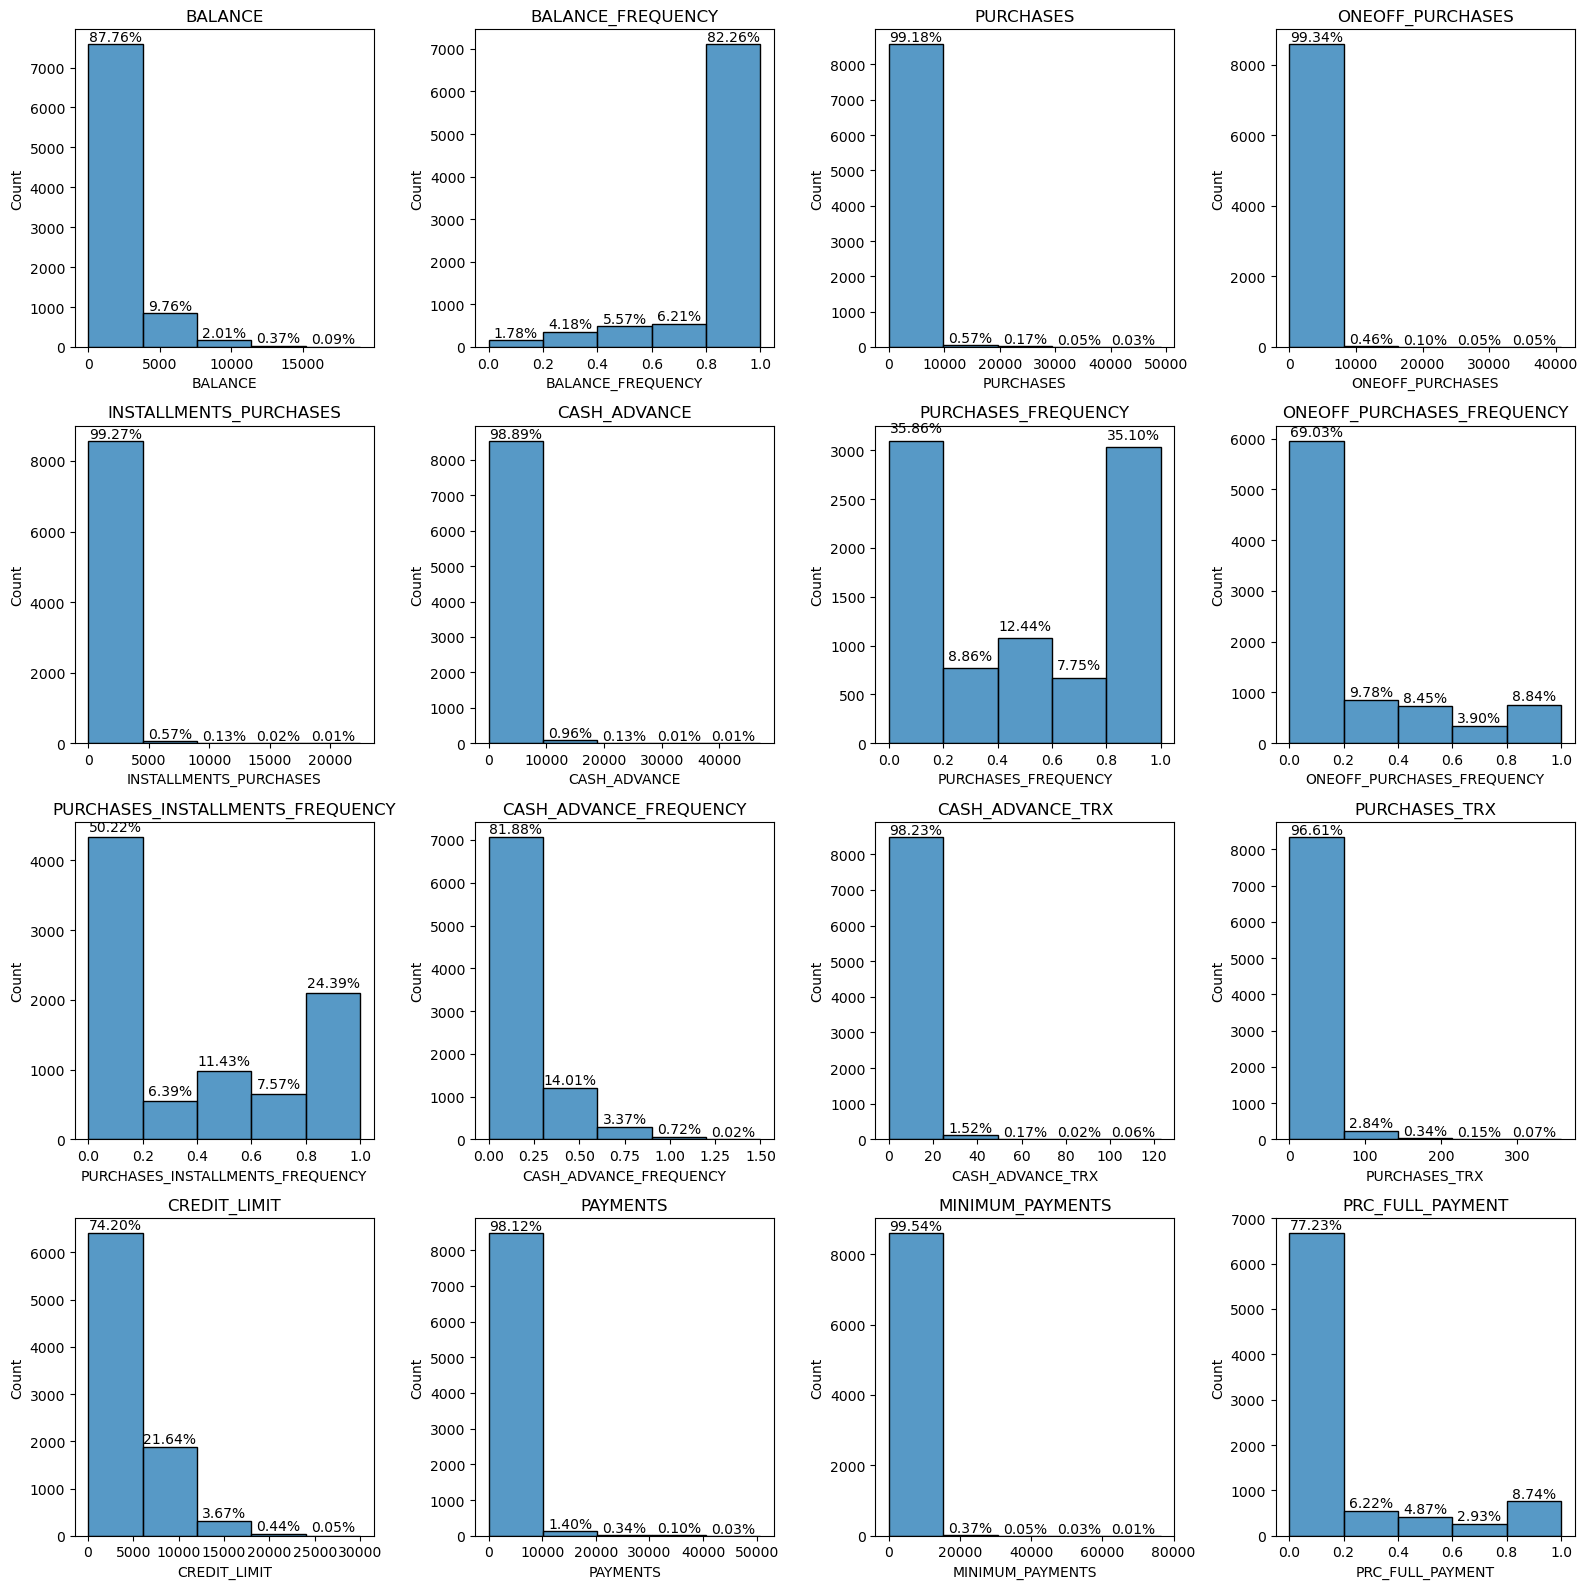

In [47]:
# Histograms for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16))

for i, col in enumerate(important_columns):
    row, col_num = divmod(i, 4)
    sns.histplot(final_data[col], bins=5, kde=False, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)
    
    # percentage
    total = len(final_data[col])
    for p in axes[row, col_num].patches:
        height = p.get_height()
        axes[row, col_num].text(p.get_x() + p.get_width() / 2.,
                                height + 0.01 * total,
                                '{:.2%}'.format(height / total),
                                ha="center")

plt.tight_layout()
plt.show()

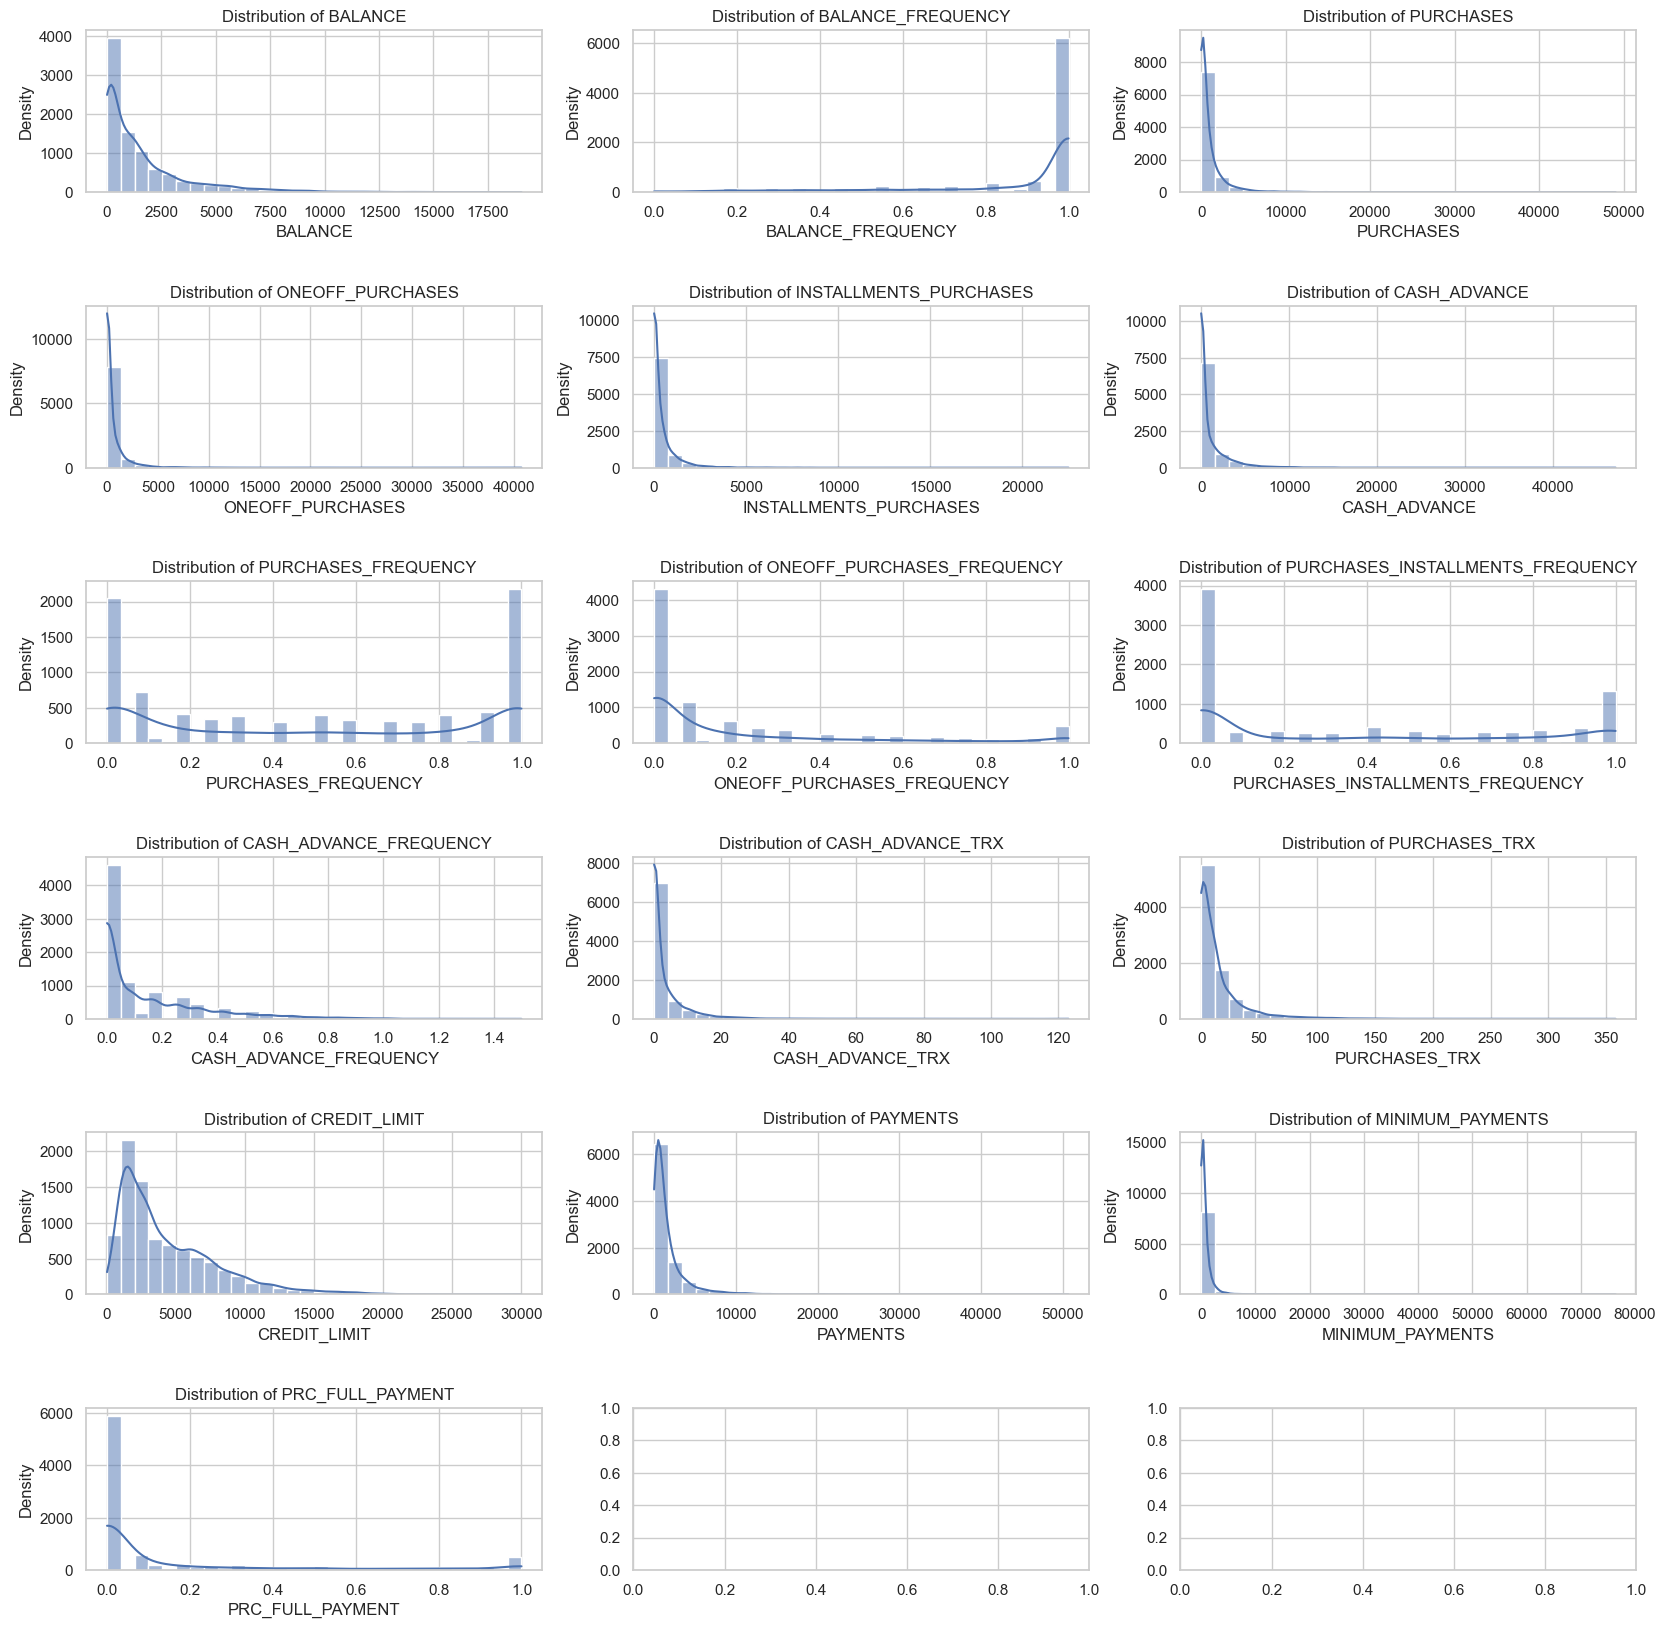

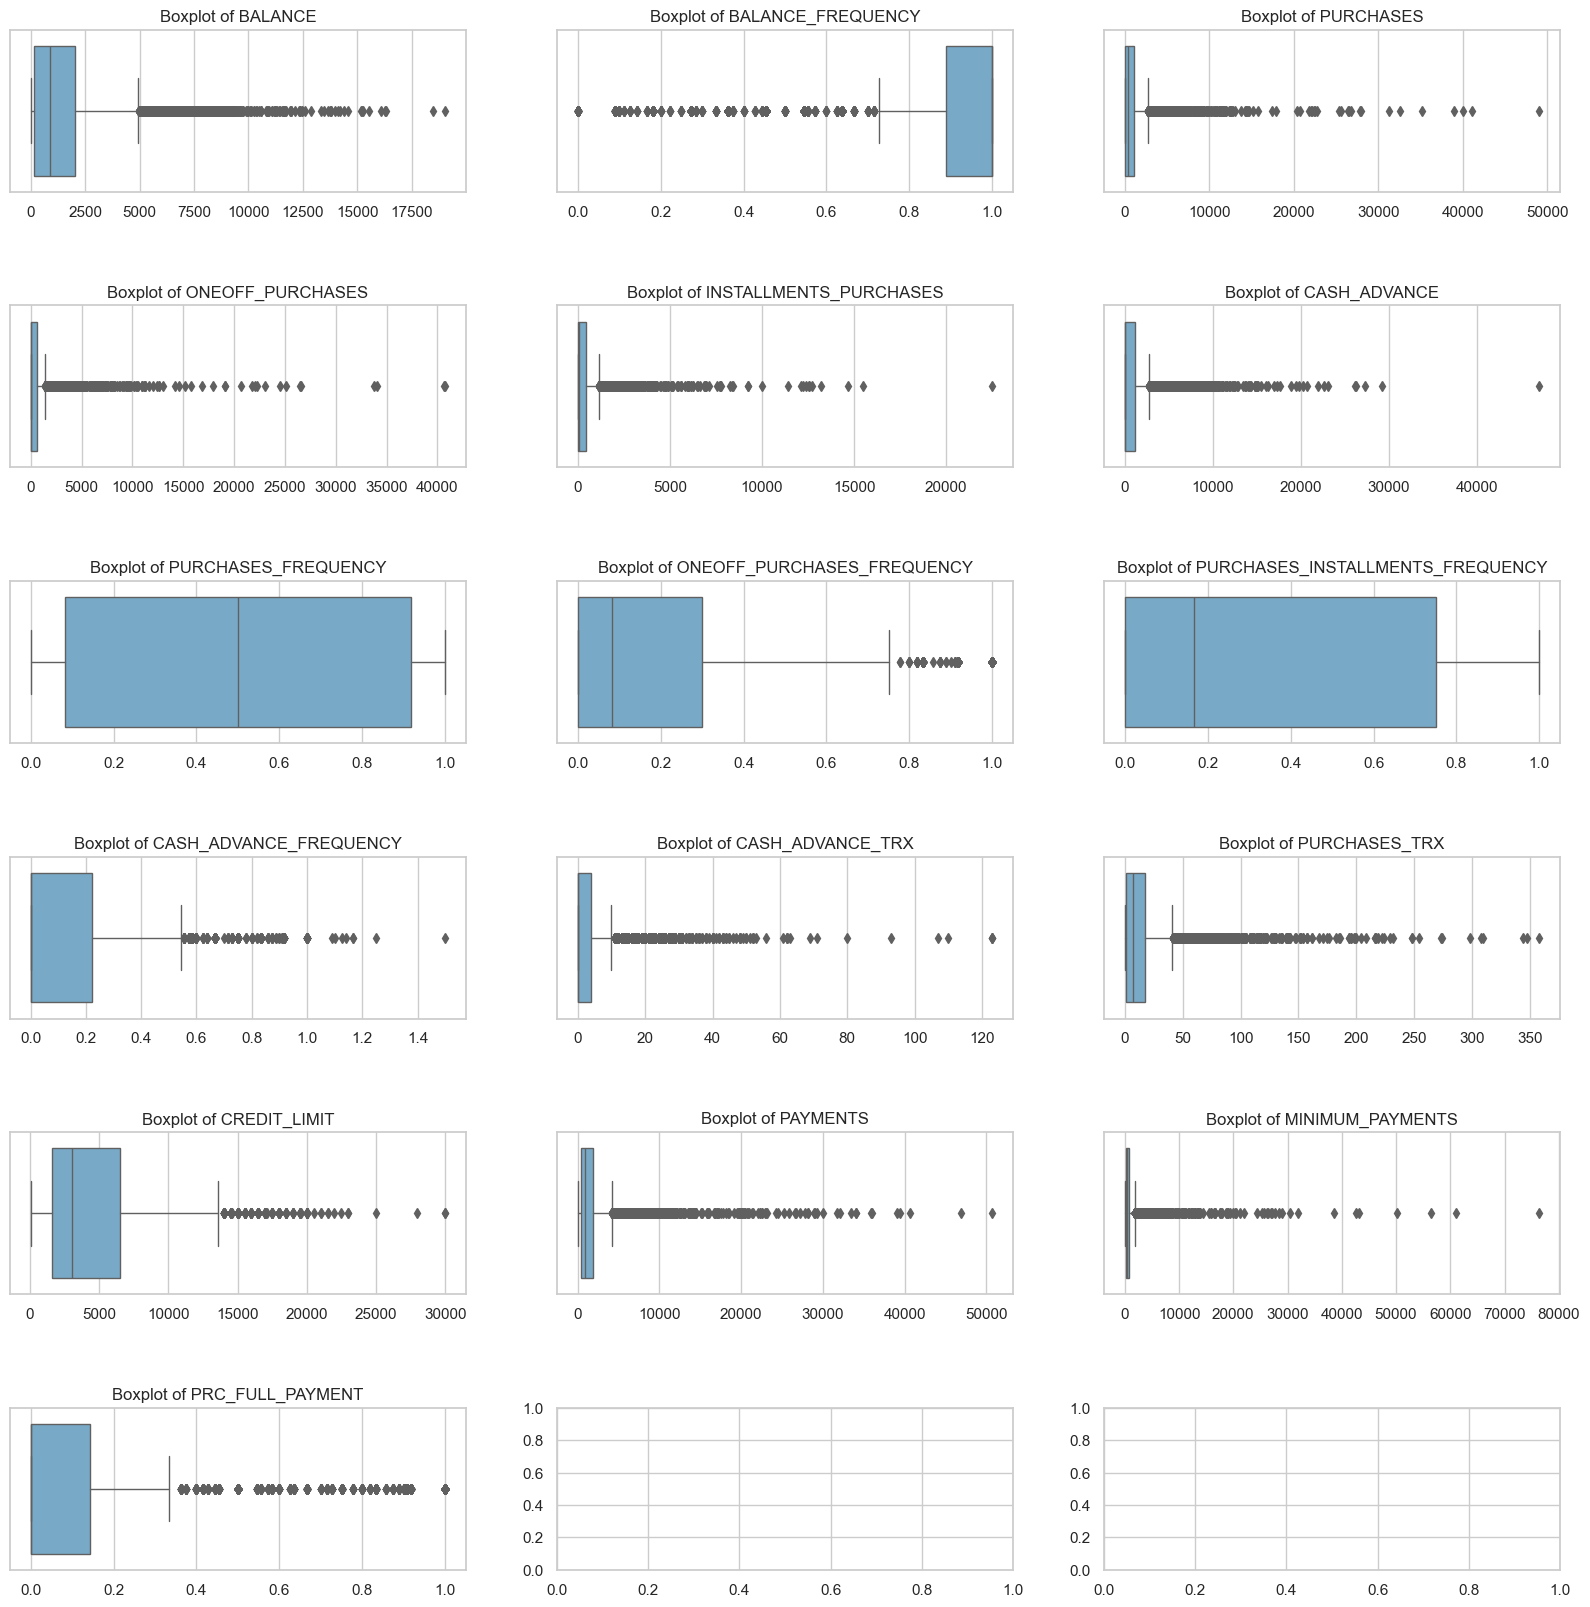

In [58]:
# Set the style of seaborn
sns.set(style="whitegrid")

# number of rows and columns for the subplot grid
num_columns = len(important_columns)
num_rows = (num_columns + 2) // 3

# subplots for histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20,20), gridspec_kw={'hspace': 0.7})

# Flatten the axes
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(important_columns):
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set(xlabel=col, ylabel='Density')

# Create subplots for boxplots
fig_box, axes_box = plt.subplots(nrows=num_rows, ncols=3, figsize=(20,20), gridspec_kw={'hspace': 0.7})

# Flatten the axes for easy iteration
axes_box = axes_box.flatten()

# Plot boxplots
for i, col in enumerate(important_columns):
    sns.boxplot(x=col, ax=axes_box[i], linewidth=1.0, palette='Blues', data=df)
    axes_box[i].set_title(f'Boxplot of {col}')
    axes_box[i].set(xlabel='')

# Adjust layout
plt.tight_layout()
plt.show()

In [59]:
df_copy.drop(columns=['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

In [63]:
df_copy.dropna(inplace=True)

In [68]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
df_copy[skewness_features] = np.log(df_copy[skewness_features] + 0.1)

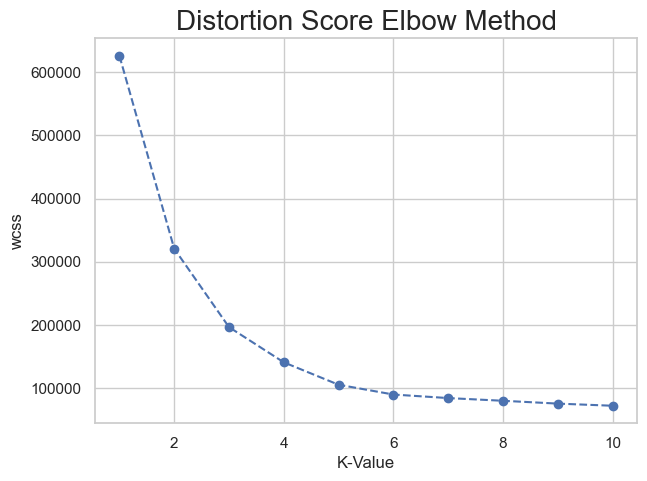

In [69]:
rcParams['figure.figsize'] = (7, 5);
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df_copy)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Distortion Score Elbow Method', fontsize =20)
plt.xlabel('K-Value')
plt.ylabel('wcss')
plt.show()

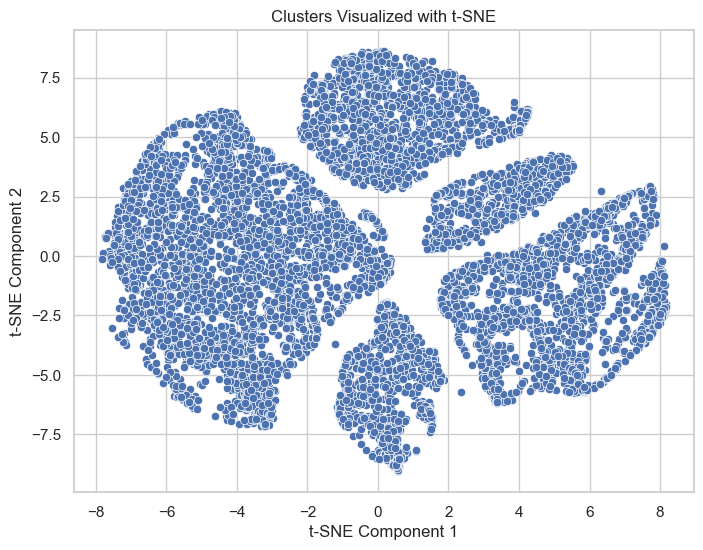

In [70]:
# Apply t-SNE to reduce dimensions to 2 for visualization
rcParams['figure.figsize'] = (8, 6);
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy)

# Add the cluster information to the reduced data
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [71]:
class K_means:
    def __init__(self, K):
        self.K = K
        self.centroids = None

    def findClosestCentroids(self, X):
        m, _ = X.shape
        closest_centroids = np.zeros(m, dtype=int)

        for i in range(m):
            distances = np.linalg.norm(X.iloc[i].values - self.centroids, axis=1)
            closest_centroids[i] = np.argmin(distances)

        return closest_centroids

    def computeCentroids(self, X, idx):
        centroids = X.groupby(idx).mean().values

        return centroids

    def kMeansInitCentroids(self, X):
        idx = np.random.choice(X.index, self.K, replace=False)
        centroids = X.loc[idx].values

        return centroids

    def KMeans_alg(self, X, initial_centroids=None):
        if initial_centroids is None:
            self.centroids = self.kMeansInitCentroids(X)
        else:
            self.centroids = initial_centroids
        
        idx = self.findClosestCentroids(X)
        self.centroids = self.computeCentroids(X, idx)

        return self.centroids, idx

    def fit_predict(self, X):
        return self.findClosestCentroids(X)

In [72]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans_amgad = K_means(n_clusters)

# KMeans
centroids, idx = kmeans_amgad.KMeans_alg(df_copy)

# fit
predictions = kmeans_amgad.fit_predict(df_copy)

In [73]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(df_copy)

KMeans(n_clusters=5)

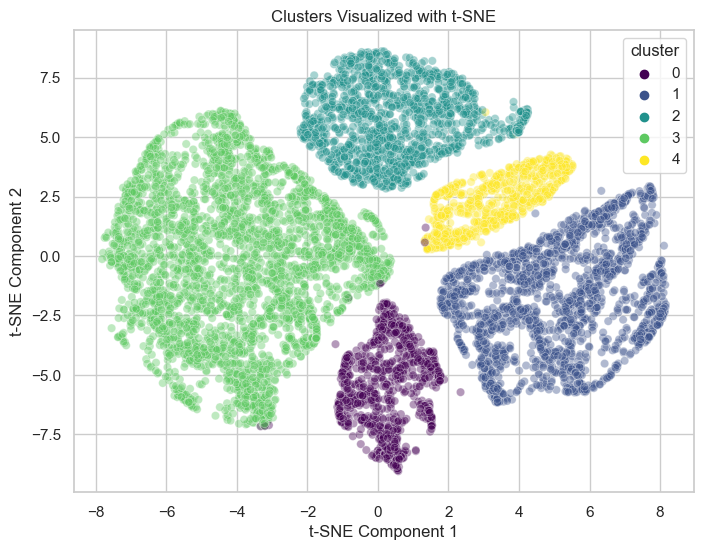

In [74]:
# Add the cluster information to the reduced data
df_tsne['cluster'] = kmeans.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()